### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### fetching the dataset: https://www.kaggle.com/datasets/lovishbansal123/sales-of-a-supermarket

In [2]:
df = pd.read_csv("supermarket_sales.csv", index_col='Invoice ID')
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### before we analyse the data, lets just look at what we have at our disposal

In [3]:
df.shape

(1000, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income

In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


#### lets check the data for null and duplicates

In [6]:
df.isnull().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### No null values found 

In [7]:
df.duplicated().sum()

np.int64(0)

#### No duplicates found

#### Lets look at the unique values and unique count to have a better understanding of the data

In [8]:
df.nunique().to_frame(name="Unique count")

,Unique count
Branch,3
City,3
Customer type,2
Gender,2
Product line,6
Unit price,943
Quantity,10
Tax 5%,990
Total,990
Date,89


In [9]:
df.apply(pd.unique).to_frame(name="Unique values")

,Unique values
Branch,"[A, C, B]"
City,"[Yangon, Naypyitaw, Mandalay]"
Customer type,"[Member, Normal]"
Gender,"[Female, Male]"
Product line,"[Health and beauty, Electronic accessories, Ho..."
Unit price,"[74.69, 15.28, 46.33, 58.22, 86.31, 85.39, 68...."
Quantity,"[7, 5, 8, 6, 10, 2, 3, 4, 1, 9]"
Tax 5%,"[26.1415, 3.82, 16.2155, 23.288, 30.2085, 29.8..."
Total,"[548.9715, 80.22, 340.5255, 489.048, 634.3785,..."
Date,"[1/5/2019, 3/8/2019, 3/3/2019, 1/27/2019, 2/8/..."


### Lets apply some transformations and feature engineering over the dataframe

If tax is 5% of unit price for all the products, we can add the tax value over the unit price and call it price.
We can now remove the tax column and Unit price column

In [10]:
df['price'] = df['Unit price'] * 1.05
df = df.drop(columns=['Tax 5%', 'Unit price'])
df.head()

,Branch,City,Customer type,Gender,Product line,Quantity,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,price
Invoice ID,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,7,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,78.4245
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,5,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,16.0440
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,7,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,48.6465
123-19-1176,A,Yangon,Member,Male,Health and beauty,8,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,61.1310
373-73-7910,A,Yangon,Normal,Male,Sports and travel,7,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,90.6255


In [11]:
df.head()

,Branch,City,Customer type,Gender,Product line,Quantity,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,price
Invoice ID,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,7,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,78.4245
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,5,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,16.0440
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,7,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,48.6465
123-19-1176,A,Yangon,Member,Male,Health and beauty,8,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,61.1310
373-73-7910,A,Yangon,Normal,Male,Sports and travel,7,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,90.6255


#### Since gross margin percentage is the same for all the products, we can drop the columns 'gross margin percentage' and 'gross income' and 'cogs' since they don't add any variability to the dataset and are just redundant 

In [12]:
df = df.drop(columns=['gross margin percentage', 'gross income', 'cogs'])
df.head()

,Branch,City,Customer type,Gender,Product line,Quantity,Total,Date,Time,Payment,Rating,price
Invoice ID,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,7,548.9715,1/5/2019,13:08,Ewallet,9.1,78.4245
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,5,80.2200,3/8/2019,10:29,Cash,9.6,16.0440
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,7,340.5255,3/3/2019,13:23,Credit card,7.4,48.6465
123-19-1176,A,Yangon,Member,Male,Health and beauty,8,489.0480,1/27/2019,20:33,Ewallet,8.4,61.1310
373-73-7910,A,Yangon,Normal,Male,Sports and travel,7,634.3785,2/8/2019,10:37,Ewallet,5.3,90.6255


#### before we proceed, we will rename all the columns for better usability

In [13]:
rename_map = {
    'Branch': 'branch',
    'City': 'city',
    'Customer type': 'customer_type',
    'Gender': 'gender',
    'Product line': 'product_line',
    'Quantity': 'quantity',
    'Total': 'total_price',
    'Date': 'invoice_date',
    'Time': 'invoice_time',
    'Payment': 'payment_type',
    'Rating': 'rating',
    'price': 'unit_price'
}
df = df.rename(mapper=rename_map, axis=1)

# we will also rename the index name
df.index.name = 'invoice_id'

df.head()

,branch,city,customer_type,gender,product_line,quantity,total_price,invoice_date,invoice_time,payment_type,rating,unit_price
invoice_id,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,7,548.9715,1/5/2019,13:08,Ewallet,9.1,78.4245
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,5,80.2200,3/8/2019,10:29,Cash,9.6,16.0440
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,7,340.5255,3/3/2019,13:23,Credit card,7.4,48.6465
123-19-1176,A,Yangon,Member,Male,Health and beauty,8,489.0480,1/27/2019,20:33,Ewallet,8.4,61.1310
373-73-7910,A,Yangon,Normal,Male,Sports and travel,7,634.3785,2/8/2019,10:37,Ewallet,5.3,90.6255


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   branch         1000 non-null   object 
 1   city           1000 non-null   object 
 2   customer_type  1000 non-null   object 
 3   gender         1000 non-null   object 
 4   product_line   1000 non-null   object 
 5   quantity       1000 non-null   int64  
 6   total_price    1000 non-null   float64
 7   invoice_date   1000 non-null   object 
 8   invoice_time   1000 non-null   object 
 9   payment_type   1000 non-null   object 
 10  rating         1000 non-null   float64
 11  unit_price     1000 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 101.6+ KB


#### combining invoice_date and invoice_time and then converting to datetime object for better accessibility of dates

In [15]:
df['invoice_date'] = df['invoice_date'] + " " + df['invoice_time']
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

In [16]:
df.head()

,branch,city,customer_type,gender,product_line,quantity,total_price,invoice_date,invoice_time,payment_type,rating,unit_price
invoice_id,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,7,548.9715,2019-01-05 13:08:00,13:08,Ewallet,9.1,78.4245
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,5,80.2200,2019-03-08 10:29:00,10:29,Cash,9.6,16.0440
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,7,340.5255,2019-03-03 13:23:00,13:23,Credit card,7.4,48.6465
123-19-1176,A,Yangon,Member,Male,Health and beauty,8,489.0480,2019-01-27 20:33:00,20:33,Ewallet,8.4,61.1310
373-73-7910,A,Yangon,Normal,Male,Sports and travel,7,634.3785,2019-02-08 10:37:00,10:37,Ewallet,5.3,90.6255


#### time to develop the new columns from invoice_date; feature engineering

In [93]:
# working on the dates and time
df['invoice_day'] = df['invoice_date'].dt.day
df['invoice_month'] = df['invoice_date'].dt.month_name()
df['invoice_weekday'] = df['invoice_date'].dt.weekday # monday->0, sunday->6
# weekday and weekend split
df['invoice_week_type'] = df['invoice_weekday'].apply(lambda x: 'weekend' if x in [5, 6] else 'weekday')

df['invoice_hour'] = df['invoice_date'].dt.hour
df['invoice_day_type'] = df['invoice_hour'].apply(lambda x: 
                         'morning' if 4 <= x <= 12 
                         else('afternoon' if 12 < x < 17 else 'evening')
                        )


In [94]:
df.head()

,branch,city,customer_type,gender,product_line,quantity,total_price,invoice_date,invoice_time,payment_type,rating,unit_price,invoice_day,invoice_month,invoice_weekday,invoice_week_type,invoice_hour,invoice_day_type
invoice_id,,,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,7,548.9715,2019-01-05 13:08:00,13:08,Ewallet,9.1,78.4245,5,January,5,weekend,13,afternoon
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,5,80.2200,2019-03-08 10:29:00,10:29,Cash,9.6,16.0440,8,March,4,weekday,10,morning
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,7,340.5255,2019-03-03 13:23:00,13:23,Credit card,7.4,48.6465,3,March,6,weekend,13,afternoon
123-19-1176,A,Yangon,Member,Male,Health and beauty,8,489.0480,2019-01-27 20:33:00,20:33,Ewallet,8.4,61.1310,27,January,6,weekend,20,evening
373-73-7910,A,Yangon,Normal,Male,Sports and travel,7,634.3785,2019-02-08 10:37:00,10:37,Ewallet,5.3,90.6255,8,February,4,weekday,10,morning


### Data Visualization and Analysis

#### Key Performance Indicators 

In [95]:
# How many days are we looking at in this analysis?
print(f"Start date: {df['invoice_date'].min().date()}")
print(f"End date: {df['invoice_date'].max().date()}")
print("\nSo we are looking at 3 whole months of 2019 from January to March")

Start date: 2019-01-01
End date: 2019-03-30

So we are looking at 3 whole months of 2019 from January to March


In [96]:
# What revenue was generated over the course of time?
print(f"Total revenue over 3 months: ${df['total_price'].sum():,.0f}")

Total revenue over 3 months: $322,967


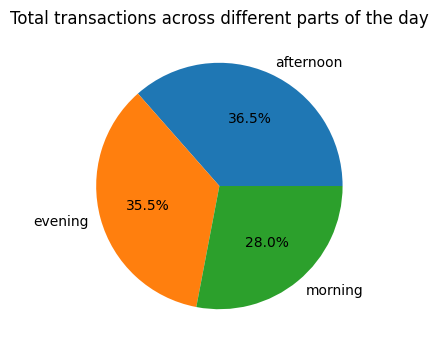

In [100]:
# How does the number of transactions split over different shift of time on an average
day_wise_purchase_group = df.groupby(by=['invoice_day_type']).size().reset_index(name='purchase_count')
day_wise_purchase_group
plt.figure(figsize=(6, 4))
plt.pie(
    x=day_wise_purchase_group['purchase_count'],
    labels=day_wise_purchase_group['invoice_day_type'], 
    autopct='%1.1f%%'
)
plt.title("Total transactions across different parts of the day")
plt.show()

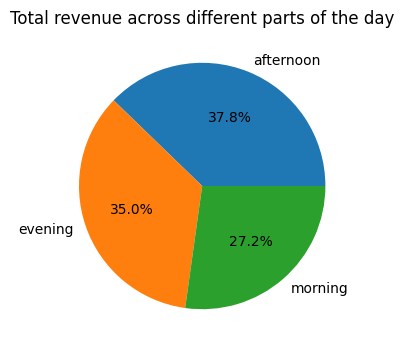

In [104]:
# How does the sales/revenue split over different shift of time on an average
day_wise_revenue = df.groupby(by=['invoice_day_type'])['total_price'].sum().reset_index(name='total_revenue')
day_wise_revenue
plt.figure(figsize=(6, 4))
plt.pie(
    x=day_wise_revenue['total_revenue'],
    labels=day_wise_revenue['invoice_day_type'], 
    autopct='%1.1f%%'
)
plt.title("Total revenue across different parts of the day")
plt.show()

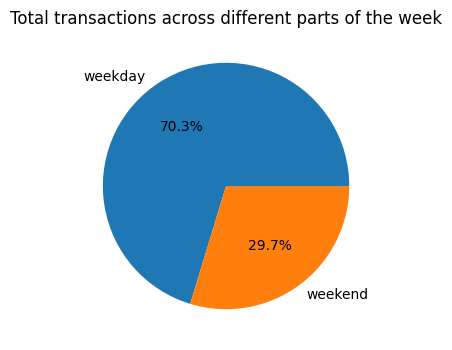

In [101]:
# How does the number of transactions split over different parts of the week
weektype_wise_purchase_group = df.groupby(by=['invoice_week_type']).size().reset_index(name='purchase_count')
weektype_wise_purchase_group
plt.figure(figsize=(6, 4))
plt.pie(
    x = weektype_wise_purchase_group['purchase_count'],
    labels = weektype_wise_purchase_group['invoice_week_type'],
    autopct="%1.1f%%"
)
plt.title("Total transactions across different parts of the week")
plt.show()

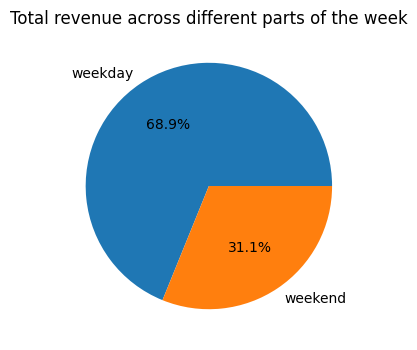

In [106]:
# How does the revenue split over different parts of the week
weektype_wise_revenue_group = df.groupby(by=['invoice_week_type'])['total_price'].sum().reset_index(name='total_revenue')
weektype_wise_revenue_group
plt.figure(figsize=(6, 4))
plt.pie(
    x = weektype_wise_revenue_group['total_revenue'],
    labels = weektype_wise_revenue_group['invoice_week_type'],
    autopct="%1.1f%%"
)
plt.title("Total revenue across different parts of the week")
plt.show()

In [107]:
# Total transactions across months
monthwise_transaction_group = df.groupby(by=['invoice_month']).size().reset_index(name='purchase_count')
monthwise_transaction_group

,invoice_month,purchase_count
0,February,303
1,January,352
2,March,345


In [108]:
# Revenue across months
monthwise_revenue_group = df.groupby(by=['invoice_month'])['total_price'].sum().reset_index(name='total_revenue')
monthwise_revenue_group

,invoice_month,total_revenue
0,February,97219.374
1,January,116291.868
2,March,109455.507
